In [1]:
import cv2
from matplotlib import pyplot as plt
from metrics import UCIQE,UIQM,CCF

import numpy as np
import pandas as pd
import os
import glob

### Metricas

In [56]:
def analyze(path_dataset,*metricas):
    """Essa função aplica a cada imagem do dataset as metricas que só recebem uma imagem como parametro 
    e retorna um DataFrame com os resultados para todos os data_sets      
    OBS: preciso adaptar para os separadores especificos do SO ! """
    result=[]
    for folder in sorted(os.listdir(path_dataset)):
        cur_folder = path_dataset + "\\" + folder                   # adaptar separadores aqui  
        print("Cur_folder: "+cur_folder)       
        
        results_cur_folder=[]
        for image_path in sorted(glob.glob(cur_folder + "\*")):     # adaptar separadores aqui
                label_img=image_path.split("\\")[-1]  # auxiliar    # adaptar separadores aqui
                label_metricas=["Imagens",]           # auxiliar
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # conversão do espaço de cores
                image=cv2.resize(image,(360,240))

                results_cur_image=[label_img,] # lista com os resultados para a imagem atual
                
                for metrica in metricas:
                    a=metrica(image)
                    results_cur_image.append(a)
                    label_metricas.append(metrica.__name__)

                results_cur_folder.append(results_cur_image)


        df_cur_folder=pd.DataFrame(results_cur_folder,columns=label_metricas)
        result.append(df_cur_folder)

    result=pd.concat(result,axis=0,join="inner",keys=['bom','excelente','pessimo','Ruim'])  # alterar as keys conforme as classificacoes
    return result
        

In [ ]:
path="dataset_pecem"
dfs=[]
for cam in os.listdir(path):
    a=analyze(path+f'\\{cam}',UCIQE,UIQM)
    dfs.append(a)

In [117]:
dfs_final=pd.concat(dfs,axis=0,join="inner",keys=['cam_124_1','cam_321','cam_323','cam_50','cam_77_3'])  # alterar as keys conforme as classificacoes
dfs_final.loc[:,["UCIQE","UIQM"]].describe()

,UCIQE,UIQM
count,40.000000,40.000000
mean,27.800739,4.595357
std,2.526750,2.270607
min,21.454845,2.057259
25%,26.696621,3.412616
50%,28.129734,3.964493
75%,29.546808,5.109123
max,31.129649,13.484787


In [118]:
display(dfs_final)

Imagens      UCIQE       UIQM
cam_124_1 bom       0  Imagem21.jpg  28.212535   4.197346
                    1  Imagem22.jpg  27.718210   3.390817
          excelente 0  Imagem19.jpg  30.830930   9.549523
                    1  Imagem20.jpg  30.552329   5.514967
          pessimo   0  Imagem25.jpg  30.814622   2.887709
                    1  Imagem26.jpg  27.250010   2.662040
          Ruim      0  Imagem23.jpg  27.667188   3.675630
                    1  Imagem24.jpg  27.038290   4.015786
cam_321   bom       0  Imagem29.jpg  28.005474   4.516983
                    1  Imagem30.jpg  29.557159   4.019890
          excelente 0  Imagem27.jpg  28.921211   5.703720
                    1  Imagem28.jpg  29.787025   5.062187
          pessimo   0  Imagem33.jpg  27.135005   3.523423
                    1  Imagem34.jpg  30.523744   3.080190
          Ruim      0  Imagem31.jpg  30.502934   3.881566
                    1  Imagem32.jpg  29.360550   2.322193
cam_323   bom       0  Imagem37.jpg  29.271811   4.507287
                    1  Imagem38.jpg  28.915902   3.740224
          excelente 0  Imagem35.jpg  31.129649   8.050103
                    1  Imagem36.jpg  29.980360   5.249931
          pessimo   0  Imagem41.jpg  29.543358   3.491344
                    1  Imagem42.jpg  29.209283   3.939283
          Ruim      0  Imagem39.jpg  29.503766   2.162887
                    1  Imagem40.jpg  28.474209   3.705688
cam_50    bom       0   Imagem5.jpg  28.339155   4.172445
                    1   Imagem6.jpg  21.672178   6.045041
          excelente 0   Imagem1.jpg  27.444648  13.484787
                    1   Imagem2.jpg  23.730295   9.905216
          pessimo   0  Imagem10.jpg  26.469169   4.775191
                    1   Imagem9.jpg  21.454845   3.989702
          Ruim      0   Imagem7.jpg  23.491877   3.713029
                    1   Imagem8.jpg  22.579092   6.971282
cam_77_3  bom       0  Imagem13.jpg  26.713895   2.702942
                    1  Imagem14.jpg  25.903325   3.562776
          excelente 0  Imagem11.jpg  27.953340   5.316921
                    1  Imagem12.jpg  30.677882   4.620593
          pessimo   0  Imagem17.jpg  26.644800   2.825865
                    1  Imagem18.jpg  28.046934   3.414982
          Ruim      0  Imagem15.jpg  24.770178   2.057259
                    1  Imagem16.jpg  26.232389   3.405517

### Canais

##### RGB

In [21]:
def splitRGB(path_dataset,path_destination):
    path=path_destination+'\\RGB'

    if not os.path.lexists(path):
        os.mkdir(path_destination+'\\RGB')
    if not os.path.lexists(path+'\\R'): # mkdir R
        os.mkdir(path+'\\R')
    if not os.path.lexists(path+'\\G'): # mkdir G
        os.mkdir(path+'\\G')
    if not os.path.lexists(path+'\\B'): # mkdir B
        os.mkdir(path+'\\B')

    for cam in sorted(os.listdir(path_dataset)):
        cur_cam = path_dataset + "\\" + cam                           
        print("Cur_cam: "+cur_cam)

        for folder in sorted(os.listdir(path_dataset+f"\\{cam}")):
            cur_folder = path_dataset + "\\" + cam + "\\" +folder                       


            for image_path in sorted(glob.glob(cur_folder + "\*")):    
                    label_img=f'{cam}_{folder}_'+image_path.split("\\")[-1]            
                    image = cv2.imread(image_path)
                    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # conversão do espaço de cores
                    # image=cv2.regitsize(image,(360,240))
                    R,G,B=cv2.split(image)

                    # escrita
                    cv2.imwrite(path+'\\R'+'\\'+label_img,R)
                    cv2.imwrite(path+'\\G'+'\\'+label_img,G)
                    cv2.imwrite(path+'\\B'+'\\'+label_img,B)

In [23]:
splitRGB("dataset_pecem","channel_analyze")

Cur_cam: dataset_pecem\cam_124_1
Cur_cam: dataset_pecem\cam_321
Cur_cam: dataset_pecem\cam_323
Cur_cam: dataset_pecem\cam_50
Cur_cam: dataset_pecem\cam_77_3


##### HSV

In [24]:
def splitHSV(path_dataset,path_destination):
    path=path_destination+'\\HSV'

    if not os.path.lexists(path):
        os.mkdir(path)
    if not os.path.lexists(path+'\\H'): # mkdir R
        os.mkdir(path+'\\H')
    if not os.path.lexists(path+'\\S'): # mkdir G
        os.mkdir(path+'\\S')
    if not os.path.lexists(path+'\\V'): # mkdir B
        os.mkdir(path+'\\V')

    for cam in sorted(os.listdir(path_dataset)):
        cur_cam = path_dataset + "\\" + cam                           
        print("Cur_cam: "+cur_cam)

        for folder in sorted(os.listdir(path_dataset+f"\\{cam}")):
            cur_folder = path_dataset + "\\" + cam + "\\" +folder                       


            for image_path in sorted(glob.glob(cur_folder + "\*")):    
                    label_img=f'{cam}_{folder}_'+image_path.split("\\")[-1]            
                    image = cv2.imread(image_path)
                    image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV) # conversão do espaço de cores
                    # image=cv2.regitsize(image,(360,240))
                    H,S,V=cv2.split(image)

                    # escrita
                    cv2.imwrite(path+'\\H'+'\\'+label_img,H)
                    cv2.imwrite(path+'\\S'+'\\'+label_img,S)
                    cv2.imwrite(path+'\\V'+'\\'+label_img,V)

In [25]:
splitHSV("dataset_pecem","channel_analyze")

Cur_cam: dataset_pecem\cam_124_1
Cur_cam: dataset_pecem\cam_321
Cur_cam: dataset_pecem\cam_323
Cur_cam: dataset_pecem\cam_50
Cur_cam: dataset_pecem\cam_77_3


##### EXEMPLOS

Text(0.5, 1.0, 'V')

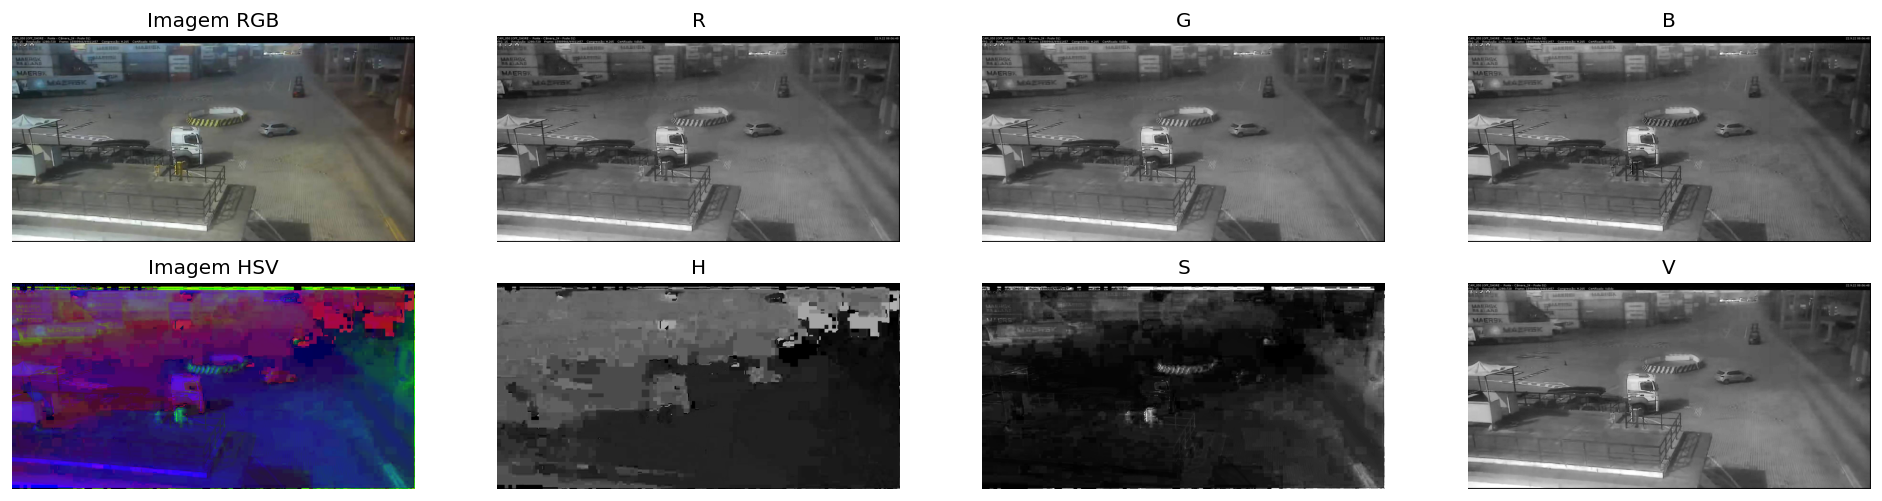

In [2]:
img=cv2.cvtColor(cv2.imread("dataset_pecem\cam_50\Bom\Imagem5.jpg"),cv2.COLOR_BGR2RGB)
r,g,b=cv2.split(img)


fig = plt.figure(figsize=(20,5),dpi=120)  
plt.subplot(241); plt.axis("off"), plt.imshow(img); plt.subplot(241).set_title("Imagem RGB")
plt.subplot(242); plt.axis("off"), plt.imshow(r,cmap='gray', vmin=0, vmax=255); plt.subplot(242).set_title("R")
plt.subplot(243); plt.axis("off"), plt.imshow(g,cmap='gray', vmin=0, vmax=255); plt.subplot(243).set_title("G")
plt.subplot(244); plt.axis("off"), plt.imshow(b,cmap='gray', vmin=0, vmax=255); plt.subplot(244).set_title("B")

img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
h,s,v=cv2.split(img)

plt.subplot(245); plt.axis("off"), plt.imshow(img, cmap='hsv'); plt.subplot(245).set_title("Imagem HSV")
plt.subplot(246); plt.axis("off"), plt.imshow(h,cmap='gray', vmin=0, vmax=255); plt.subplot(246).set_title("H")
plt.subplot(247); plt.axis("off"), plt.imshow(s,cmap='gray', vmin=0, vmax=255); plt.subplot(247).set_title("S")
plt.subplot(248); plt.axis("off"), plt.imshow(v,cmap='gray', vmin=0, vmax=255); plt.subplot(248).set_title("V")